In [87]:
#3.1 function to calculate the shannon entropy of a dataSet

import operator
from math import log

def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    #create dictionary of all possible classes
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2)
    return shannonEnt

In [88]:
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        classCount[vote] = classCount.get(vote, 0) + 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [89]:
#Dataset splitting on a given feature

#three inputs: the dataset we'll split, the feature we'll split on, and the value of the featrue to return
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            #若选中，则将featVec[axis]元素在新list中去掉
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            #构建仅包含选中元素的return list
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [90]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing','flippers']
    return dataSet, labels    

In [91]:
myDat, labels = createDataSet()

In [92]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [93]:
calcShannonEnt(myDat)

0.9709505944546686

In [94]:
splitDataSet(myDat, 0, 1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [95]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
            infoGain = baseEntropy - newEntropy
            if (infoGain > bestInfoGain):
                bestInfoGain = infoGain
                bestFeature = i
    return bestFeature


In [96]:
chooseBestFeatureToSplit(myDat)

0

In [97]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [98]:
def createTree(dataSet,labels):
    classList=[example[-1] for example in dataSet]
    if classList.count(classList[0])==len(classList):
        return classList[0]
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    bestFeat=chooseBestFeatureToSplit(dataSet)
    print(bestFeat)
    bestFeatLabel=labels[bestFeat]
    myTree={bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues=[example[bestFeat] for example in dataSet]
    uniqueVals=set(featValues)
    for value in uniqueVals:
        subLabels=labels[:]
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),subLabels)
    return myTree

In [99]:
def createTree(dataSet,labels):
    #获得分类名称列表
    classList=[example[-1] for example in dataSet]
    #如果列表中的值都相同，则停止递归
    if classList.count(classList[0])==len(classList):
        return classList[0]
    #如果遍历完数据的属性，数据集只剩下一个属性，则停止遍历
    if len(dataSet[0])==1:
        #此时返回数据集中出现最多的分类名称作为分类标签
        return majorityCnt(classList)
    bestFeat=chooseBestFeatureToSplit(dataSet)
    print(bestFeat)
    #这里的labels表示属性列表，并不是类标签
    bestFeatLabel=labels[bestFeat]
    myTree={bestFeatLabel:{}}
    #从属性列表中删除已划分的属性
    del(labels[bestFeat])
    #得到划分属性列中包含的所有属性值
    featValues=[example[bestFeat] for example in dataSet]
    uniqueVals=set(featValues)
    #向下传递数据，继续划分
    for value in uniqueVals:
        subLabels=labels[:]
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),subLabels)
    return myTree

In [100]:
myTree = createTree(myDat, labels)

0
0


In [101]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [102]:
#plotting tree nodes with text annotations
import matplotlib.pyplot as plt

decisionNode = dict(boxstyle="sawtooth", fc="0.8") # 注（a）
leafNode = dict(boxstyle="round4", fc='0.8')
arrow_args = dict(arrowstyle="<-")  # 箭头样式

def plotNode(nodeTxt, centerPt, parentPt, nodeType):  #  centerPt节点中心坐标  parentPt 起点坐标
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction', xytext=centerPt, textcoords='axes fraction', va="center", ha="center", bbox=nodeType, arrowprops=arrow_args) # 注（b）
    
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white') # 创建一个新图形
    fig.clf() #  清空绘图区
    createPlot.ax1 = plt.subplot(111,frameon=False)  # subplot(323)和subplot(3,2,3)是相同的
    plotNode('a decision Node', (0.5,0.1), (0.1,0.5), decisionNode)
    plotNode('a leaf Node', (0.8,0.1), (0.3,0.8), leafNode)
    plt.show()

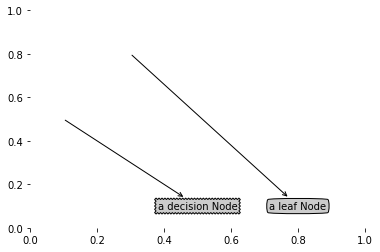

In [103]:
createPlot(myTree)

In [104]:
#indentifying the number of leaves in a tree and the depth
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in list(secondDict.keys()):
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs = getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in list(secondDict.keys()):
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

In [105]:
def retrieveTree(i):
    listOfTrees = [{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}, {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}]
    return listOfTrees[i]

In [106]:
retrieveTree(0)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [107]:
xTree = retrieveTree(1)

In [108]:
getNumLeafs(xTree)

3

In [109]:
getTreeDepth(xTree)

3

In [110]:
#the plotTree function

def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)
    
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in list(secondDict.keys()):
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD
    
def createPlot(myTree):
    fig = plt.figure(1, facecolor = 'white')
    fig.clf()
    axprops = dict(xticks = [], yticks = [])
    createPlot.ax1 = plt.subplot(111, frameon = False)
    plotTree.totalW = float(getNumLeafs(myTree))
    plotTree.totalD = float(getTreeDepth(myTree))
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(myTree, (0.5, 1.0), '')
    plt.show()

def createPlot(myTree):
    fig = plt.figure(1, facecolor = 'white') 
    fig.clf()
    axprops = dict(xticks = [], yticks = [])
    createPlot.ax1 = plt.subplot(111, frameon = False)
    plotTree.totalW = float(getNumLeafs(myTree))
    plotTree.totalD = float(getTreeDepth(myTree))
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(myTree, (0.5, 1.0), '')
    plt.show()

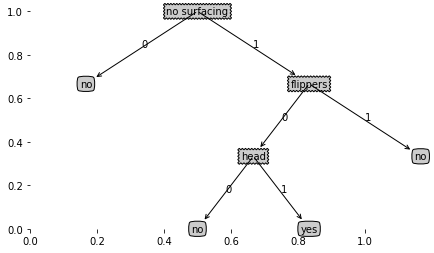

In [111]:
createPlot(xTree)

In [112]:
myTree['no surfacing'][3] = 'maybe'

In [113]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

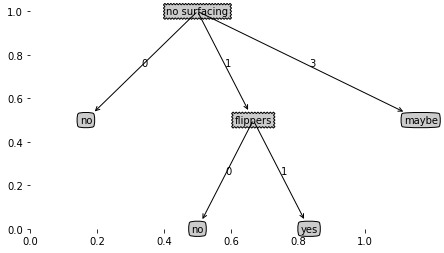

In [114]:
createPlot(myTree)

In [115]:
def plotMidText(cntrPt, parentPt, txtString):
    """
    Function：   在父子节点间填充文本信息
    Args：       cntrPt：树信息
                parentPt：父节点坐标
                txtString：文本注解
    Returns：    无
    """
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    """
    Function：   创建数据集和标签
    Args：       myTree：树信息
                parentPt：箭头起始坐标
                nodeTxt：文本注解
    Returns：    无
    """
    #计算树的宽
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    #计算树的高
    depth = getTreeDepth(myTree)
    #第一个关键字为第一次划分数据集的类别标签，附带的取值表示子节点的取值
    firstStr = list(myTree.keys())[0]     #the text label for this node should be this
    #下一个节点的位置
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    #计算父节点和子节点的中间位置，并在此处添加简单的文本信息
    plotMidText(cntrPt, parentPt, nodeTxt)
    #绘制此节点带箭头的注解
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    #新的树，相当于脱了一层皮
    secondDict = myTree[firstStr]
    #按比例减少全局变量plotTree.yOff
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    #
    for key in secondDict.keys():
        #判断子节点是否为字典类型
        if type(secondDict[key]).__name__=='dict':
            #是的话表明该节点也是一个判断节点，递归调用plotTree()函数 
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            #不是的话更新x坐标值
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            #绘制此节点带箭头的注解
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            #绘制此节点带箭头的注解
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    #按比例增加全局变量plotTree.yOff
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict
 
    
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white') # 创建一个新图形
    fig.clf() #  清空绘图区
    axprops = dict(xticks = [], yticks = [])
    createPlot.ax1 = plt.subplot(111,frameon=False, **axprops)  # subplot(323)和subplot(3,2,3)是相同的
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    #取得叶节点数目
    plotTree.totalW = float(getNumLeafs(inTree))
    #取得树最大层
    plotTree.totalD = float(getTreeDepth(inTree))
    #设置起点值
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0

    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

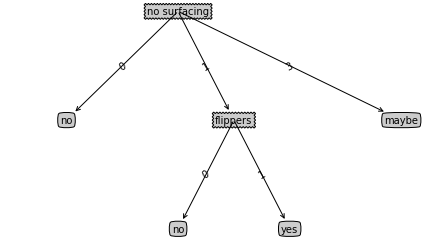

In [116]:
createPlot(myTree)

In [117]:
#classification function for an existing decision trdd
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in list(secondDict.keys()):
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

In [118]:
myDat, labels = createDataSet()
labels

['no surfacing', 'flippers']

In [119]:
myTree = retrieveTree(0)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [120]:
classify(myTree, labels, [1, 0])

'no'

In [121]:
classify(myTree, labels, [1, 1])

'yes'

In [122]:
def storeTree(inputTree, filename):
    import pickle
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()
    
def grabTree(filename):
    import pickle
    fr = open(filename, 'rb')
    return pickle.load(fr)

In [123]:
storeTree(myTree, 'classifierStorage.txt')

In [124]:
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [125]:
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
print(lenses)
lensesLabels = ['age', 'prescript', 'astignatic', 'tearRate']
lensesTree = createTree(lenses, lensesLabels)

[['young', 'myope', 'no', 'reduced', 'no lenses'], ['young', 'myope', 'no', 'normal', 'soft'], ['young', 'myope', 'yes', 'reduced', 'no lenses'], ['young', 'myope', 'yes', 'normal', 'hard'], ['young', 'hyper', 'no', 'reduced', 'no lenses'], ['young', 'hyper', 'no', 'normal', 'soft'], ['young', 'hyper', 'yes', 'reduced', 'no lenses'], ['young', 'hyper', 'yes', 'normal', 'hard'], ['pre', 'myope', 'no', 'reduced', 'no lenses'], ['pre', 'myope', 'no', 'normal', 'soft'], ['pre', 'myope', 'yes', 'reduced', 'no lenses'], ['pre', 'myope', 'yes', 'normal', 'hard'], ['pre', 'hyper', 'no', 'reduced', 'no lenses'], ['pre', 'hyper', 'no', 'normal', 'soft'], ['pre', 'hyper', 'yes', 'reduced', 'no lenses'], ['pre', 'hyper', 'yes', 'normal', 'no lenses'], ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'no', 'normal', 'no lenses'], ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'yes', 'normal', 'hard'], ['presbyopic', 'hyper', 'no', 'redu

In [126]:
lensesTree

{'tearRate': {'reduced': 'no lenses',
  'normal': {'astignatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'age': {'pre': {'prescript': {'hyper': 'no lenses',
        'myope': 'hard'}},
      'presbyopic': {'prescript': {'hyper': 'no lenses', 'myope': 'hard'}},
      'young': 'hard'}}}}}}

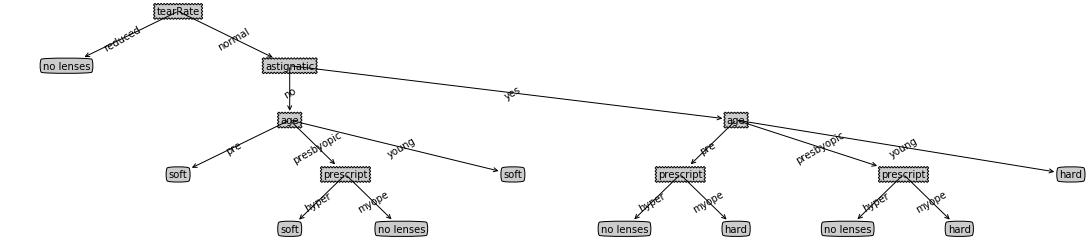

In [127]:
createPlot(lensesTree)